## Algoritmos populares de agrupación no supervisada

---



---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Conjunto de datos para probar nuestros algoritmos...

Se trata de un conjunto de datos reales sobre el estado de los conocimientos de los estudiantes sobre el tema de las máquinas eléctricas de corriente continua. 
El conjunto de datos se ha obtenido de la tesis doctoral.
User Knowledge Modeling: https://archive-beta.ics.uci.edu/ml/datasets/user+knowledge+modeling 
Las características son:

STG (El grado de tiempo de estudio para las materias del objeto de la meta),

SCG (El grado de repetición del usuario para las materias del objeto de la meta)

STR (El grado de tiempo de estudio del usuario para los objetos relacionados con el objeto de la meta)

LPR (El rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta)

PEG (El rendimiento en el examen del usuario para los objetos de la meta)

UNS (El nivel de conocimiento del usuario)

Vamos a repetir lo visto en clase con esta data y vamos a verificar que efectivamente nuestro algoritmos pueden identificar los grupos que ellos han identificado. Habrá que definir una métrica para luego medir con que grado de confianza hemos hecho algoritmos que de verdad clasifican bien.

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Data_User.csv to Data_User.csv


In [8]:
data=pd.read_csv("Data_User.csv", delimiter =";",header=0)

In [9]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


Lo primero es que vamos a codificar nuestro atributo de clasificación (la última columna). Para ello vamos a hacer algo como lo siguiente:

In [10]:
data["UNS"].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [11]:
data["UNS"]=data["UNS"].replace("Very Low",0)
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)

In [12]:
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3
399,0.78,0.61,0.71,0.19,0.60,2
400,0.54,0.82,0.71,0.29,0.77,3
401,0.50,0.75,0.81,0.61,0.26,2


In [14]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [63]:
pd.DataFrame(np.unique(data["UNS"], return_counts=True), columns=["Muy bajo", "Bajo", "Medio", "Alto"]).T

,0,1
Muy bajo,0,50
Bajo,1,129
Medio,2,122
Alto,3,102


Al renombrar la última columna, tenemos una nueva categorización para los cluster, donde el 0 tiene 50 observaciones, 129 en el 1, 122 en el 2 y finalmente 102 en el 3. Lo cual será util para posteriomente evaluar la efectividad de los métodos. 

In [15]:
data.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [18]:
print("La cantidad total de datos en el dataset es", len(data))

La cantidad total de datos en el dataset es 403


La tabla resumen, a demas muestra que los valores de las variables se encuentran estandarizados de cero a uno, de tal forma que el valor minimo que toman es 0 y el valor maximo esta al rededor del 0.9. 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 KB


In [24]:
data0=data[["STG","SCG","STR","LPR","PEG"]]
data0.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


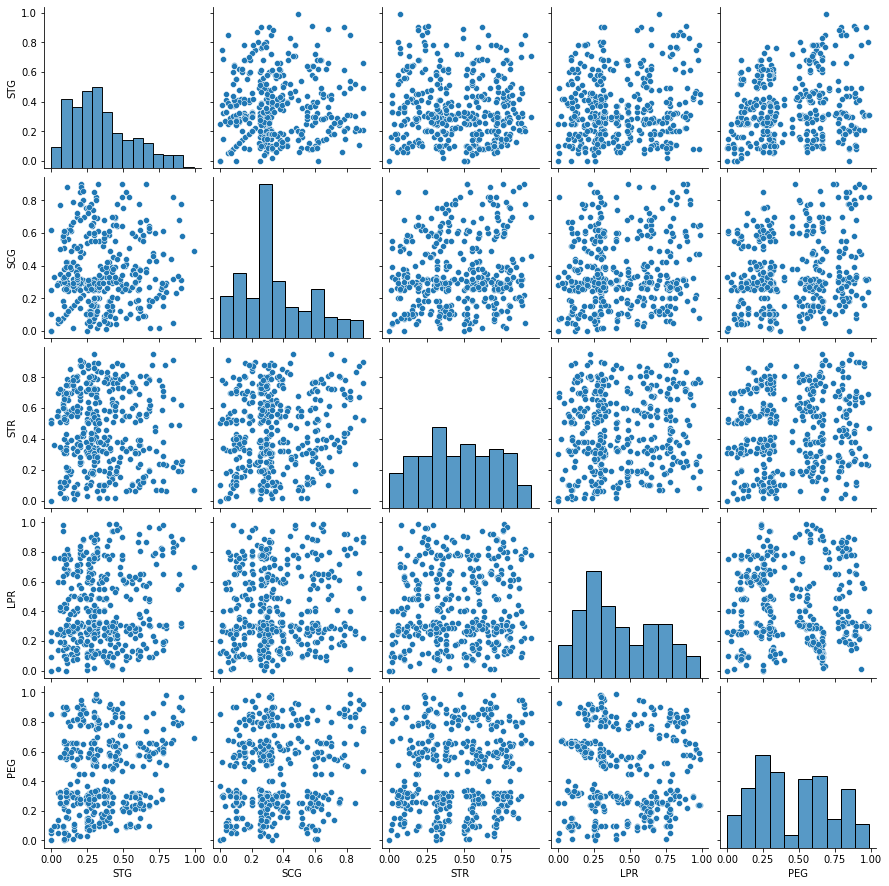

In [183]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data0, aspect=1)
plt.show()


La grafica muestra la correlación entre cada una de las 6 variables, y vemos que para algunos casos no se aprecia segmentación entre grupos, sin embargo, al estudiar la relación entre las variables PEG y LPR, la grafica muestra como se dividen las observaciones en 4 grupos fundamentales, asimismo, la relación de las variables PEG y STR donde se observa la división de los datos en 6 grupos.

Vamos a aplicar los algoritmos de Clustering para el conjunto de datos data0.
Aplicaremos 4 algoritmos:


1.   K-Means
2.   Clustering jerárquico
3.   DBSCAN
3.   Mean Shift



## 1.  Aplicando K-Means

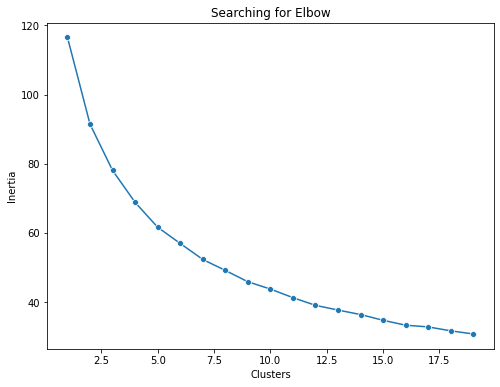

In [28]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax, marker="o")
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

El método del codo nos dice que debemos seleccionar el cluster cuando hay un cambio significativo en la inercia. Como se observa en el gráfico, el punto de inflexión se sitúa de 4 a 5.

Conforme a la subdivisión en grupos demostrada en la correlación de las variables LPR y PEG, se procederan a aplicar los metodos de Clustering entre ellas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


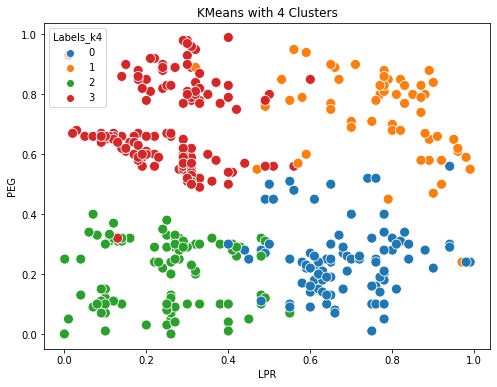

In [29]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


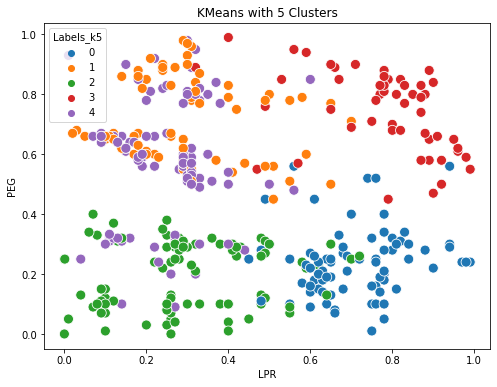

In [64]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(data0)
data['Labels_k5'] = km5.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


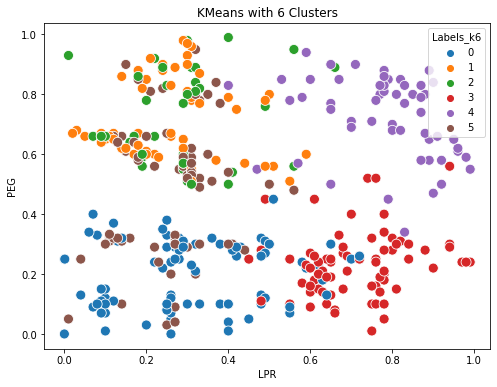

In [30]:
# 6 cluster
km4 = KMeans(n_clusters=6).fit(data0)
data['Labels_k6'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('tab10', 6), s=100)
plt.title('KMeans with 6 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


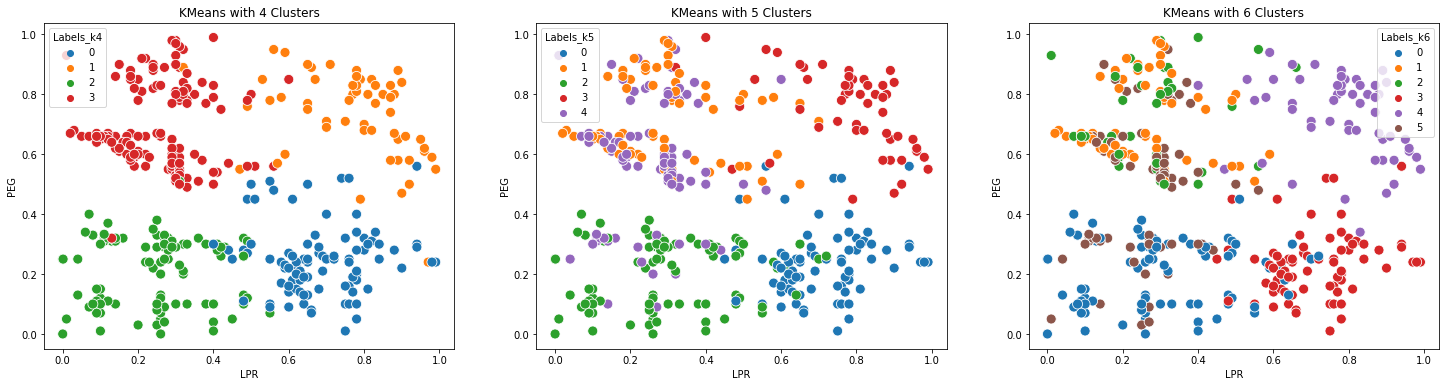

In [184]:
plt.figure(figsize=(25, 6))
plt.subplot(131)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.subplot(132)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.subplot(133)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('tab10', 6), s=100)
plt.title('KMeans with 6 Clusters')
plt.show()

A juzgar por los gráficos podríamos decir que el cluster 4 parece ajustarse mejor a los datos que el cluster 5 y el 6. 

Al analizar nuestro 4 cluster en detalle para las variables seleccionadas, tenemos:

Examen de la materia (LPR) y examen del tema (PEG)
- Etiqueta 0 (Azul): Alto LPR y PEG bajo. 
- Etiqueta 1 (Naranja): Alto LPR y PEG alto. 
- Etiqueta 2 (Verde): Bajo LPR y PEG bajo. 
- Etiqueta 3 (Rojo): Bajo LPR y PEG alto. 

Observaciones de las etiquetas

In [68]:
len(data[data["Labels_k4"]==0]), len(data[data["Labels_k4"]==1]), len(data[data["Labels_k4"]==2]), len(data[data["Labels_k4"]==3])

(99, 56, 113, 135)

## 2. Aplicando Clustering jerárquico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


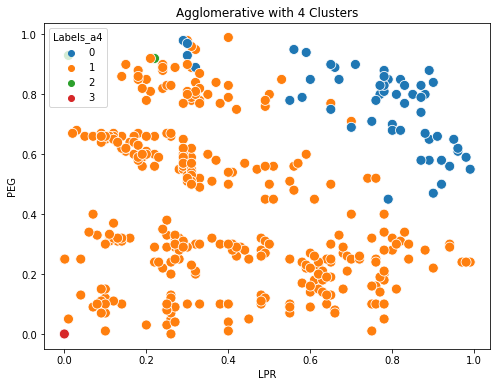

In [31]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('Agglomerative with 4 Clusters')
plt.show()

Al evaluar la gráfica, en comparación con el metodo K-means, podemos evidenciar que el metodo de clustering jerarquico no se ajusta a los datos, ya que aunque realizar la división en 4 grupos, deja solo dos observaciones en la etiqueta 2 y una en la 3, concentrando el resto de las observaciones en las etiquetas 0 y 1. 

Observaciones de la Etiqueta 2

In [66]:
data[data["Labels_a4"]==2]

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4,Labels_db,Labels_bw,Labels_k5
54,0.210,0.90,0.90,0.22,0.92,3,3,2,2,0,3,4
331,0.495,0.82,0.67,0.01,0.93,3,3,2,2,0,3,4


Observaciones de la Etiqueta 3

In [67]:
data[data["Labels_a4"]==3]

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4,Labels_db,Labels_bw,Labels_k5
145,0.0,0.0,0.0,0.0,0.0,0,2,0,3,0,0,2


## 3. Aplicando Clustering DBSCAN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


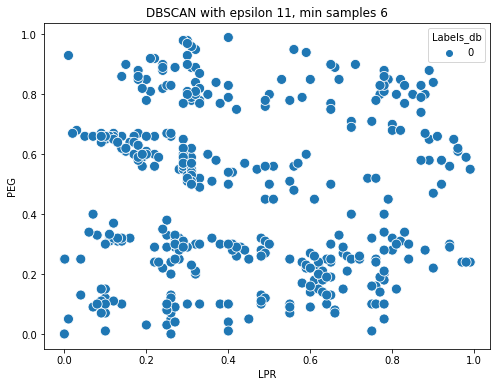

In [45]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=100, min_samples=200).fit(data0)

data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

El metodo DBSCAN tampoco resulta ser útil para nuestro conjunto de datos, ya que no realiza una subdivisión entre las variables y deja todas observaciones en una unica etiqueta. 

## 4. Algoritmo Mean Shift

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


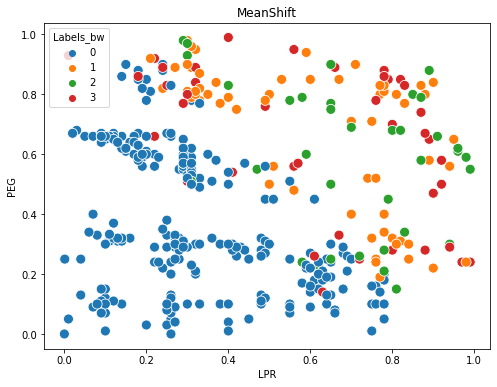

In [61]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data0, quantile=0.0819)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()

Finalmente, al probar el algoritmo Mean-Shift sobre nuestros datos, vemos que aunque el metodo realiza un division por grupos en 4 etiquetas, estas se encuentran superpuestas entre si, lo cual no da una buena sensacion de ajuste a los datos.  

In [160]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4,Labels_db,Labels_bw,Labels_k5
0,0.00,0.10,0.50,0.26,0.05,0,2,0,1,0,0,2
1,0.05,0.05,0.55,0.60,0.14,1,0,3,1,0,0,0
2,0.08,0.18,0.63,0.60,0.85,3,3,4,0,0,1,4
3,0.20,0.20,0.68,0.67,0.85,3,1,4,0,0,1,3
4,0.22,0.22,0.90,0.30,0.90,3,3,5,1,0,1,4


In [146]:
data1=data.copy()

In [163]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [172]:
data["Labels_k4"].value_counts()

3    135
2    113
0     99
1     56
Name: Labels_k4, dtype: int64

In [179]:
data1["UNS_Kmeans"]=data1["Labels_k4"].replace(0,4)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(1,0)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(3,1)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(4,3)
data1["UNS_Original"]=data1["UNS"].replace(0,"Muy Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(1,"Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(2,"Medio")
data1["UNS_Original"]=data1["UNS_Original"].replace(3,"Alto")
data1

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4,Labels_db,Labels_bw,Labels_k5,UNS_Kmeans,UNS_Original
0,0.00,0.10,0.50,0.26,0.05,0,2,0,1,0,0,2,2,Muy Bajo
1,0.05,0.05,0.55,0.60,0.14,1,0,3,1,0,0,0,3,Bajo
2,0.08,0.18,0.63,0.60,0.85,3,3,4,0,0,1,4,1,Alto
3,0.20,0.20,0.68,0.67,0.85,3,1,4,0,0,1,3,0,Alto
4,0.22,0.22,0.90,0.30,0.90,3,3,5,1,0,1,4,1,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,1,4,0,0,3,3,0,Alto
399,0.78,0.61,0.71,0.19,0.60,2,3,2,1,0,0,4,1,Medio
400,0.54,0.82,0.71,0.29,0.77,3,3,2,1,0,3,4,1,Alto
401,0.50,0.75,0.81,0.61,0.26,2,0,3,1,0,3,0,3,Medio


In [168]:
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

In [177]:
accuracy_score(data1["UNS_Kmeans"],data1["UNS"])

0.01240694789081886

In [178]:
(1 - accuracy_score(data1["UNS_Kmeans"],data1["UNS"]))*100

98.75930521091811

Finalmente, se puede concluir que el modelo K-means con 4 cluster es el que mas se ajusta al conjunto de datos, con una precisión del error de 0.012, y una precisión de ajuste del modelo de 98,76. 